In [2]:
# Imports needed in every section
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Import and simplify score data

In [5]:
# Read in data from file
raw_data = pd.read_csv("oct_data.csv")

In [42]:
# Select only the relevant columns
score_df = raw_data.copy()

# t is the number of manipulations
column_renaming = {"True Label": "Y",
                    "CVDoorDash PM Score": "t=0", 
                    "Cleaned GPT-4o Conversation-Improved CVDoorDash PM Score": "t=1",
                    "Cleaned Twice GPT-4o Conversation-Improved CVDoorDash PM Score": "t=2"
                }

score_df = score_df.rename(columns = column_renaming)

score_df = score_df[column_renaming.values()]

In [43]:
score_df

,Y,t=0,t=1,t=2
0,0,77.283,77.720,77.467
1,0,77.283,79.134,78.956
2,0,76.478,77.406,77.301
3,0,77.730,78.668,80.373
4,0,78.287,78.450,77.869
...,...,...,...,...
515,1,74.669,75.305,75.530
516,1,78.783,81.236,80.971
517,1,81.537,80.474,80.565
518,1,79.434,81.882,81.805


In [27]:
# Export
score_df.to_csv("simple_data.csv")

# Partition the data into groups/test-train

In [48]:
from typing import *

# Given the dataframe, return a new column with the given colum_name
# alpha proportion of these will be randomly assigned to label_1 
# Optionally accept a random_state for consistency
def randomly_partition(df, column_name: str, label_1: str, label_2: str, alpha: float, random_state = None):
    sliced_df = df.copy()

    # Assign randomly
    sliced_df[column_name] = label_2
    sliced_df.loc[sliced_df.sample(frac=alpha, random_state=random_state).index, column_name] = label_1

    return sliced_df


TRAIN_PROPORTION = 0.5      # The amount of the dataset to dedicate to train (e.g. 0.80)
GROUP_A_PROPORTION = 0.5    # The amount of the dataset to dedicate to Group A

assign_test_train = lambda df : randomly_partition(df, "Set", "Test", "Train", TRAIN_PROPORTION, random_state = 0)  # stay consistent
assign_groups = lambda df : randomly_partition(df, "Group", "A", "B", GROUP_A_PROPORTION)                           # randomize the groups

assign_groups = lambda df : randomly_partition(df, "Group", "A", "B", GROUP_A_PROPORTION, random_state = 0)                           # randomize the groups


# Evaluate Performance

In [56]:
# Given a row, return the score that the Hirer evaluates
def get_evaluated_score(row) -> float:
    if row["Group"] == "A":
        return row["t=2"]       # Both Applicant and Hirer manipulation
    else:
        return row["t=1"]       # Only Hirer manipulation

# Given a dataset with a testing-training split and group split, compute the exclusive threshold
# (highest score from negative class in the testing_training split)


In [49]:
example_df = assign_groups(assign_test_train(score_df))

In [54]:
example_df.loc[example_df["Set"] == "Train"]

,Y,t=0,t=1,t=2,Set,Group
0,0,77.283,77.720,77.467,Train,B
3,0,77.730,78.668,80.373,Train,B
9,0,78.540,79.292,79.364,Train,B
11,0,80.955,79.763,79.920,Train,B
13,0,78.539,82.988,83.225,Train,B
...,...,...,...,...,...,...
507,1,80.373,80.979,83.271,Train,B
511,1,84.207,82.870,82.859,Train,B
513,1,81.576,82.495,81.755,Train,B
514,1,84.274,82.952,83.053,Train,B


In [58]:
example_df.loc[example_df["Set"] == "Train"].apply(get_evaluated_score, axis=1)

0      77.720
3      78.668
9      79.292
11     79.763
13     82.988
        ...  
507    80.979
511    82.870
513    82.495
514    82.952
518    81.882
Length: 260, dtype: float64

# Old Code

/var/folders/6d/ffdjbx496k5dqjgrkzxf2zlw0000gp/T/ipykernel_21940/492999276.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 1000x700 with 0 Axes>

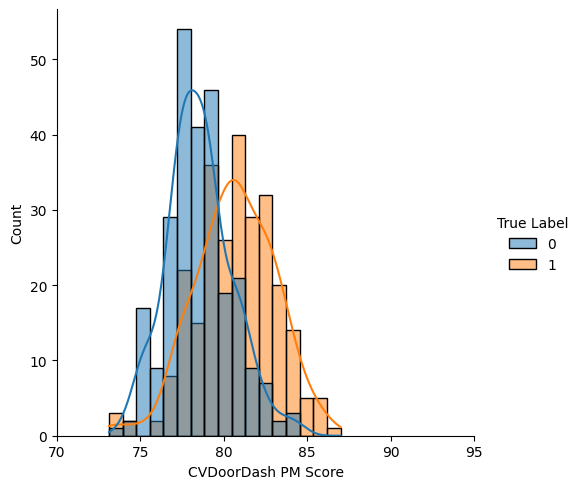

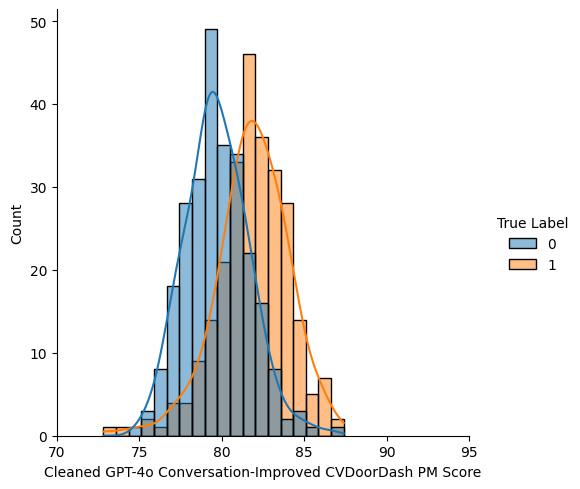

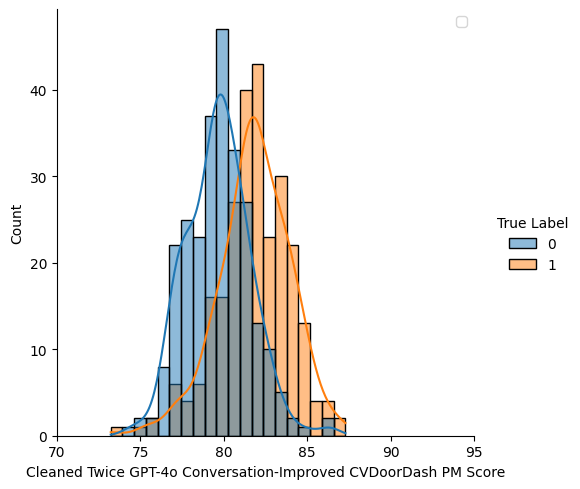

In [14]:
# Import data
# Plot
import matplotlib.pyplot as plt
import seaborn as sns
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
og_col = 'CVDoorDash PM Score'
one_mod_col = "Cleaned GPT-4o Conversation-Improved CVDoorDash PM Score"
twice_mod_col = "Cleaned Twice GPT-4o Conversation-Improved CVDoorDash PM Score"
plt.figure(figsize=(10,7), dpi= 100)
sns.displot(data=finaldata, x="CVDoorDash PM Score", hue = 'True Label', kde=True)
plt.xlim(70,95)
#ee.map(specs,'CV Score')
sns.displot(data=finaldata, x=one_mod_col, hue = 'True Label', kde=True)
plt.xlim(70,95)
sns.displot(data=finaldata, x=twice_mod_col, hue = 'True Label', kde=True)

#sns.displot(data=truedata, x="CV Score", color = 'deeppink', kde=True)
###sns.displot(x1, color="dodgerblue", label="Compact", **kwargs)
#sns.displot(x2, color="orange", label="SUV", **kwargs)
#sns.displot(x3, color="deeppink", label="minivan", **kwargs)
plt.xlim(70,95)
plt.legend()

In [17]:
import numpy as np
'''(+) Mean
(+) STD
(-) Mean
(-) STD
Overall Mean'''
print("Original Score")
print("+ Mean:", np.mean(list(finaldata[finaldata['True Label']==1][og_col])))
print("+ STD:", np.std(list(finaldata[finaldata['True Label']==1][og_col])))
print("- Mean:", np.mean(list(finaldata[finaldata['True Label']==0][og_col])))
print("- STD:", np.std(list(finaldata[finaldata['True Label']==0][og_col])))
print("All Mean:", np.mean(list(finaldata[og_col])))
print("All STD:", np.std(list(finaldata[og_col])))

print("Once Mod Score")
print("+ Mean:", np.mean(list(finaldata[finaldata['True Label']==1][one_mod_col])))
print("+ STD:", np.std(list(finaldata[finaldata['True Label']==1][one_mod_col])))
print("- Mean:", np.mean(list(finaldata[finaldata['True Label']==0][one_mod_col])))
print("- STD:", np.std(list(finaldata[finaldata['True Label']==0][one_mod_col])))
print("All Mean:", np.mean(list(finaldata[one_mod_col])))
print("All STD:", np.std(list(finaldata[one_mod_col])))

print("Twice Mod Score")
print("+ Mean:", np.mean(list(finaldata[finaldata['True Label']==1][twice_mod_col])))
print("+ STD:", np.std(list(finaldata[finaldata['True Label']==1][twice_mod_col])))
print("- Mean:", np.mean(list(finaldata[finaldata['True Label']==0][twice_mod_col])))
print("- STD:", np.std(list(finaldata[finaldata['True Label']==0][twice_mod_col])))
print("All Mean:", np.mean(list(finaldata[twice_mod_col])))
print("All STD:", np.std(list(finaldata[twice_mod_col])))

Original Score
+ Mean: 80.68283076923079
+ STD: 2.4001032049555433
- Mean: 78.52512692307694
- STD: 1.93339949790671
All Mean: 79.60397884615385
All STD: 2.4317043361392994
Once Mod Score
+ Mean: 81.86902692307693
+ STD: 2.2116990865113517
- Mean: 79.71520769230769
- STD: 1.9270170299680751
All Mean: 80.79211730769231
All STD: 2.3371431409391477
Twice Mod Score
+ Mean: 81.82341923076923
+ STD: 2.154062836830623
- Mean: 79.64893846153845
- STD: 1.9121587005824117
All Mean: 80.73617884615385
All STD: 2.308735683128867


In [28]:
adv_true = 0
adv_neg = 0
marked_for_advantage = []
for index, row in input_data.iterrows():
    if row['True Label'] == 1:
        if adv_true < 25:
            marked_for_advantage.append(1)
        else:
            marked_for_advantage.append(0)
        adv_true +=1

    if row['True Label'] == 0:
        if adv_neg < 25:
            marked_for_advantage.append(1)
        else:
            marked_for_advantage.append(0)
        adv_neg +=1
    

In [30]:
input_data['Applicant Will Manipulate'] = marked_for_advantage

In [33]:
len(input_data[(input_data['Applicant Will Manipulate']==1) & (input_data['True Label']==0)])

25

In [41]:
input_data.columns

Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0',
       'Position', 'Moreinfo', 'Looking For', 'Highlights', 'Primary Keyword',
       'English Level', 'Experience Years', 'CV', 'CV_lang', 'id',
       '__index_level_0__', 'True Label', 'Marked for Experiments',
       'GPT-4o Conversation-Improved CV',
       'Cleaned GPT-4o Conversation-Improved CV',
       'Twice GPT-4o Conversation-Improved CV',
       'Cleaned Twice GPT-4o Conversation-Improved CV', 'CV Score',
       'Cleaned GPT-4o Conversation-Improved CV Score',
       'Cleaned Twice GPT-4o Conversation-Improved CV Score', 'CVBIT PM Score',
       'Cleaned GPT-4o Conversation-Improved CVBIT PM Score',
       'Cleaned Twice GPT-4o Conversation-Improved CVBIT PM Score',
       'Applicant Will Manipulate'],
      dtype='object')

In [57]:
def add_applicant_scores(input_csv, no_mod_col, mod_one_col, twice_mod_col, job_name:str = ""):
    applicant_scores = []
    for index, row in input_csv.iterrows():
        if row['Applicant Will Manipulate'] ==1:
            #print(input_csv[one_mod_col])
            applicant_scores.append(max(row[mod_one_col], row[no_mod_col]))
        else:
            applicant_scores.append(row[no_mod_col])
    input_csv[job_name + " Applicant Reported Scores"] = applicant_scores
    return

def add_two_ticket_scores(input_csv, reported_col, mod_one_col, twice_mod_col, job_name:str = ""):
    testing_scores = []
    for index, row in input_csv.iterrows():
        if row['Applicant Will Manipulate']==1:
            testing_scores.append(max(row[reported_col], row[twice_mod_col]))
        else:
            testing_scores.append(max(row[reported_col], row[mod_one_col]))
    input_csv[job_name + " Testing Scores"] = testing_scores

In [55]:
add_applicant_scores(input_data, "CVBIT PM Score", "Cleaned GPT-4o Conversation-Improved CVBIT PM Score", 'Cleaned Twice GPT-4o Conversation-Improved CVBIT PM Score', 'BIT PM')

In [58]:
add_two_ticket_scores(input_data, "BIT PM Applicant Reported Scores", "Cleaned GPT-4o Conversation-Improved CVBIT PM Score", 'Cleaned Twice GPT-4o Conversation-Improved CVBIT PM Score', 'BIT PM')

In [6]:
final_data.columns

Index(['Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1',
       'Unnamed: 0', 'Position', 'Moreinfo', 'Looking For', 'Highlights',
       'Primary Keyword', 'English Level', 'Experience Years', 'CV', 'CV_lang',
       'id', '__index_level_0__', 'True Label', 'Marked for Experiments',
       'GPT-4o Conversation-Improved CV',
       'Cleaned GPT-4o Conversation-Improved CV',
       'Twice GPT-4o Conversation-Improved CV',
       'Cleaned Twice GPT-4o Conversation-Improved CV', 'CV Score',
       'Cleaned GPT-4o Conversation-Improved CV Score',
       'Cleaned Twice GPT-4o Conversation-Improved CV Score', 'CVBIT PM Score',
       'Cleaned GPT-4o Conversation-Improved CVBIT PM Score',
       'Cleaned Twice GPT-4o Conversation-Improved CVBIT PM Score',
       'Applicant Will Manipulate', ' Applicant Reported Scores',
       'BIT PM Applicant Reported Scores', 'BIT PM Testing Scores',
       ' Testing Scores'],
      dtype='object')

In [7]:
#add_two_ticket_scores(input_data, " Applicant Reported Scores", "Cleaned GPT-4o Conversation-Improved CV Score", 'Cleaned Twice GPT-4o Conversation-Improved CV Score')

In [67]:
input_data.to_csv('data/connie_data.csv')

In [12]:
output_data = pd.read_csv("data/connie_data.csv")
output_data.head

In [17]:
row_chosen = random.choice([i for i in range(len(output_data))])
row_chosen

139

In [48]:
finaldata.columns

Index(['Unnamed: 0.6', 'Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3',
       'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'Position', 'Moreinfo',
       'Looking For', 'Highlights', 'Primary Keyword', 'English Level',
       'Experience Years', 'CV', 'CV_lang', 'id', '__index_level_0__',
       'True Label', 'Marked for Experiments',
       'GPT-4o Conversation-Improved CV',
       'Cleaned GPT-4o Conversation-Improved CV',
       'Twice GPT-4o Conversation-Improved CV',
       'Cleaned Twice GPT-4o Conversation-Improved CV',
       'Cleaned GPT-4o Conversation-Improved CVDoorDash PM Score',
       'Cleaned Twice GPT-4o Conversation-Improved CVDoorDash PM Score',
       'CVDoorDash PM Score', 'Together Conversation-Improved CV',
       'Cleaned Together Conversation-Improved CV',
       'Cleaned Together Conversation-Improved CVDoorDash PM Score',
       'Will Manipulate', 'Applicant Reported Scores', 'Testing Scores'],
      dtype='object')

In [82]:
#positive_cv_scores = original_positive_cv_scores
#negative_cv_scores = original_negative_cv_scores
#positive_name: str = "Original PM"          # change me
#negative_name: str = "Original UI"          # change me

output_data = finaldata
positive_cv_scores_one_ticket = list(output_data[output_data['True Label']==1]['Applicant Reported Scores'])
negative_cv_scores_one_ticket = list(output_data[output_data['True Label']==0]['Applicant Reported Scores'])
positive_name: str = "Tailored PM"          # change me
negative_name: str = "Tailored UI"          # change me


def conservatively_optimal_TPR_and_Threshold(positive_cv_scores, negative_cv_scores, positive_name, negative_name):
    '''
    Collect key statistics
    '''
    #print(num_positive_scores, num_negative_scores)
    num_positive_scores = len(positive_cv_scores)
    num_negative_scores = len(negative_cv_scores)
    print(num_positive_scores, num_negative_scores)
    positive_proportion = num_positive_scores / (num_positive_scores + num_negative_scores)
    negative_proportion = 1 - positive_proportion

    positive_mean = np.mean(positive_cv_scores)
    positive_std = np.std(positive_cv_scores)
    negative_mean = np.mean(negative_cv_scores)
    negative_std = np.std(negative_cv_scores)

    from sklearn.metrics import roc_curve, auc
    y_true = np.concatenate((np.ones(num_positive_scores), np.zeros(num_negative_scores)))
    y_score = np.concatenate((positive_cv_scores, negative_cv_scores))
    FPRs, TPRs, thresholds = roc_curve(y_true, y_score, drop_intermediate=False) 
    roc_auc = auc(FPRs, TPRs)

    accuracies = positive_proportion * TPRs + negative_proportion * (1 - FPRs)
    optimal_index = np.argmax(accuracies)
    optimal_accuracy = accuracies[optimal_index]
    optimal_threshold = thresholds[optimal_index]
    optimal_TPR = TPRs[optimal_index]
    optimal_TNR = 1 - FPRs[optimal_index]

    conservatively_optimal_index = np.argmax(np.where(FPRs == 0, TPRs, -np.NAN))      # mask elements where FPR is not 0 with negative infinity
    conservatively_optimal_TPR = TPRs[conservatively_optimal_index]
    conservatively_optimal_threshold = thresholds[conservatively_optimal_index]

    return {"TPR":conservatively_optimal_TPR, "Threshold":conservatively_optimal_threshold}

def conservatively_optimal_TPR_difference_A_B(dataframe, threshold):
    total = len(dataframe)
    TPR_A = 0
    TPR_B=0
    a_s, b_s = 0, 0
    for index, row in dataframe.iterrows():
        if row['Will Manipulate']==1:
            #print(row['True Label'], row['CVBIT PM Score'])
            if row['True Label']==1:
                if row['CVDoorDash PM Score'] >=threshold:
                    TPR_A +=1
            a_s+=1
        else:
            if row['True Label']==1:
                if row['CVDoorDash PM Score'] >=threshold:
                    TPR_B +=1
            b_s+=1
    return TPR_A/a_s-TPR_B/b_s


In [53]:
finaldata.columns

Index(['Unnamed: 0.6', 'Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3',
       'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'Position', 'Moreinfo',
       'Looking For', 'Highlights', 'Primary Keyword', 'English Level',
       'Experience Years', 'CV', 'CV_lang', 'id', '__index_level_0__',
       'True Label', 'Marked for Experiments',
       'GPT-4o Conversation-Improved CV',
       'Cleaned GPT-4o Conversation-Improved CV',
       'Twice GPT-4o Conversation-Improved CV',
       'Cleaned Twice GPT-4o Conversation-Improved CV',
       'Cleaned GPT-4o Conversation-Improved CVDoorDash PM Score',
       'Cleaned Twice GPT-4o Conversation-Improved CVDoorDash PM Score',
       'CVDoorDash PM Score', 'Together Conversation-Improved CV',
       'Cleaned Together Conversation-Improved CV',
       'Cleaned Together Conversation-Improved CVDoorDash PM Score',
       'Will Manipulate', 'Applicant Reported Scores', 'Testing Scores'],
      dtype='object')

In [83]:
#positive_cv_scores = original_positive_cv_scores
#negative_cv_scores = original_negative_cv_scores
#positive_name: str = "Original PM"          # change me
#negative_name: str = "Original UI"          # change me

positive_cv_scores_1 = list(output_data[output_data['True Label']==1]['Applicant Reported Scores'])
negative_cv_scores_1 = list(output_data[output_data['True Label']==0]['Applicant Reported Scores'])
positive_name_1: str = "Tailored PM"          # change me
negative_name_1: str = "Tailored UI"          # change me

one_ticket_TPR_and_Threshold = conservatively_optimal_TPR_and_Threshold(positive_cv_scores_1, negative_cv_scores_1, positive_name_1, negative_name_1)
one_ticket_TPR = one_ticket_TPR_and_Threshold['TPR']
one_ticket_treshold = one_ticket_TPR_and_Threshold['Threshold']

TPR_diff_1 = conservatively_optimal_TPR_difference_A_B(output_data, one_ticket_treshold)
print("1 Ticket Results:\n")
print("Conservatively Optimal TPR", one_ticket_TPR)
print("Conservatively Optimal Threshold", one_ticket_treshold)
print("Difference in TPR_A - TPR_B:", TPR_diff_1)



260 260
1 Ticket Results:

Conservatively Optimal TPR 0.0
Conservatively Optimal Threshold 86.701
Difference in TPR_A - TPR_B: 0.0038461538461538464


In [84]:
#positive_cv_scores = original_positive_cv_scores
#negative_cv_scores = original_negative_cv_scores
#positive_name: str = "Original PM"          # change me
#negative_name: str = "Original UI"          # change me

positive_cv_scores_2 = list(output_data[output_data['True Label']==1]['Testing Scores'])
negative_cv_scores_2 = list(output_data[output_data['True Label']==0]['Testing Scores'])
positive_name_2: str = "Tailored PM"          # change me
negative_name_2: str = "Tailored UI"          # change me

two_ticket_TPR_and_Threshold = conservatively_optimal_TPR_and_Threshold(positive_cv_scores_2, negative_cv_scores_2, positive_name_2, negative_name_2)
two_ticket_TPR = two_ticket_TPR_and_Threshold['TPR']
two_ticket_treshold = two_ticket_TPR_and_Threshold['Threshold']

TPR_diff_2 = conservatively_optimal_TPR_difference_A_B(output_data, two_ticket_treshold)


print("Two Ticket Results:\n")
print("Conservatively Optimal TPR", two_ticket_TPR)
print("Conservatively Optimal Threshold", two_ticket_treshold)
print("Difference in TPR_A - TPR_B:", TPR_diff_2)



260 260
Two Ticket Results:

Conservatively Optimal TPR 0.011538461538461539
Conservatively Optimal Threshold 86.398
Difference in TPR_A - TPR_B: 0.0038461538461538464


In [87]:
#Bootstrapping Test
from random import sample
import random
from sklearn.metrics import roc_curve, auc
output_data = finaldata

testing_scores = 'Testing Scores'
applicant_scores = 'Applicant Reported Scores'
samples_one_ticket = list(output_data[applicant_scores])
samples_two_ticket = list(output_data[testing_scores])

tpr_two_tickets = []
tpr_one_tickets = []
tpr_diffs_two_tickets = []
tpr_diffs_one_tickets = []

for test_index in range(1000):
    one_tick_pos= []
    two_tick_pos = []

    one_tick_neg = []
    two_tick_neg = []

    #Randomly sample 500 from population. Assign to +/- class accordingly
    '''for elem in range(0, 500):
        #subdata = output_data[output_data['True Label']==1]
        row_chosen = random.choice([i for i in range(len(output_data))])

        if output_data.loc[row_chosen]['True Label']==1:
            one_tick_pos.append([output_data.loc[row_chosen][applicant_scores]])
            two_tick_pos.append([output_data.loc[row_chosen][testing_scores]])
        else:
            one_tick_neg.append([output_data.loc[row_chosen][applicant_scores]])
            two_tick_neg.append([output_data.loc[row_chosen][testing_scores]])
'''
    for elem in range(0, 100):
        subdata = output_data[(output_data['True Label']==1) & (output_data['Will Manipulate']==True)]
        row_chosen = random.choice([i for i in range(len(subdata))])

        one_tick_pos.append([output_data.loc[row_chosen][applicant_scores]])
        two_tick_pos.append([output_data.loc[row_chosen][testing_scores]])
    for elem in range(0, 100):
        subdata = output_data[(output_data['True Label']==1) & (output_data['Will Manipulate']==False)]
        row_chosen = random.choice([i for i in range(len(subdata))])

        one_tick_pos.append([output_data.loc[row_chosen][applicant_scores]])
        two_tick_pos.append([output_data.loc[row_chosen][testing_scores]])

    for elem in range(0, 100):
        subdata = output_data[(output_data['True Label']==0) & (output_data['Will Manipulate']==False)]
        row_chosen = random.choice([i for i in range(len(subdata))])

        one_tick_neg.append([output_data.loc[row_chosen][applicant_scores]])
        two_tick_neg.append([output_data.loc[row_chosen][testing_scores]])

    for elem in range(0, 100):
        subdata = output_data[(output_data['True Label']==0) & (output_data['Will Manipulate']==True)]
        row_chosen = random.choice([i for i in range(len(subdata))])

        one_tick_neg.append([output_data.loc[row_chosen][applicant_scores]])
        two_tick_neg.append([output_data.loc[row_chosen][testing_scores]])
    
       
   # print(len(one_tick_neg)+len(one_tick_pos))#+len(two_tick_pos))
    y_one_tick_true = np.concatenate((np.ones(len(one_tick_pos)), np.zeros(len(one_tick_neg))))
    y_two_tick_true = np.concatenate((np.ones(len(two_tick_pos)), np.zeros(len(two_tick_neg))))
    y_one_tick_scores_true = np.concatenate((one_tick_pos, one_tick_neg))
    y_two_tick_scores_true = np.concatenate((two_tick_pos, two_tick_neg))

    #Outcomes of One-Ticket Classifer
    FPRs_one, TPRs_one, thresholds_1 = roc_curve(y_one_tick_true, y_one_tick_scores_true, drop_intermediate=False) 

    #Outcomes of Two-Ticket Classifer
    FPRs_2, TPRs_2, thresholds_2 = roc_curve(y_two_tick_true, y_two_tick_scores_true, drop_intermediate=False) 

    conservatively_optimal_index_one = np.argmax(np.where(FPRs_one == 0, TPRs_one, -np.NAN))      # mask elements where FPR is not 0 with negative infinity
    conservatively_optimal_TPR_1 = TPRs_one[conservatively_optimal_index_one]
    conservatively_optimal_threshold_1= thresholds_1[conservatively_optimal_index_one]

    conservatively_optimal_index_two = np.argmax(np.where(FPRs_2 == 0, TPRs_2, -np.NAN))      # mask elements where FPR is not 0 with negative infinity
    conservatively_optimal_TPR_2 = TPRs_one[conservatively_optimal_index_two]
    conservatively_optimal_threshold_2= thresholds_2[conservatively_optimal_index_two]

    tpr_two_tickets.append(round(conservatively_optimal_TPR_2, 3))
    tpr_one_tickets.append(round(conservatively_optimal_TPR_1, 3))
    #print(thresholds_2)
    tpr_diffs_two_tickets.append(conservatively_optimal_TPR_difference_A_B(output_data, conservatively_optimal_threshold_2))
    tpr_diffs_one_tickets.append(conservatively_optimal_TPR_difference_A_B(output_data, conservatively_optimal_threshold_1))


tpr_diffs_1_vs_2 = [tpr_two_tickets[i]-tpr_one_tickets[i] for i in range(0, len(tpr_two_tickets))]
diff_A_B_diffs = [tpr_diffs_two_tickets[i]-tpr_diffs_one_tickets[i] for i in range(0, len(tpr_diffs_two_tickets))]
#If 0 is in the below range, that means our increase in TPR is not significant: currently the values are very high, because our POPULATION size is only 200... 

In [88]:
info = pd.DataFrame()
info['TPR One Ticket'] = tpr_one_tickets
info['TPR Two Ticket'] = tpr_two_tickets
info['TPR Diff A B One Ticket'] = tpr_diffs_one_tickets
info['TPR Diff A B Two Ticket'] = tpr_diffs_two_tickets
info['TPR Diff Between Two One Ticket'] = tpr_diffs_1_vs_2
info['TPR Diff A B One vs Two Ticket'] = diff_A_B_diffs

In [93]:
print("TPR does not increase significantlly for a two ticket system (compared to a one ticket).")
sample_difference = two_ticket_TPR-one_ticket_TPR
#print(current_mean-1.96*np.std(tpr_diffs_1_vs_2), current_mean, current_mean+1.96*np.std(tpr_diffs_1_vs_2))
print(sample_difference-1.96*np.std(tpr_diffs_1_vs_2), sample_difference, sample_difference+1.96*np.std(tpr_diffs_1_vs_2))

print("TPR Differences between Groups A and B decreases significantly.")
sample_app_B_diff =TPR_diff_2-TPR_diff_1
#print(current_A_B_diff-1.96*np.std(diff_A_B_diffs), current_A_B_diff, current_A_B_diff+1.96*np.std(diff_A_B_diffs))
print(sample_app_B_diff-1.96*np.std(diff_A_B_diffs), sample_app_B_diff, 1.96*sample_app_B_diff+0.5*np.std(diff_A_B_diffs))

TPR does not increase significantlly for a two ticket system (compared to a one ticket).
0.006927001795603536 0.011538461538461539 0.01614992128131954
TPR Differences between Groups A and B decreases significantly.
-0.00317968518779629 0.0 0.0008111441805602781


In [90]:
print(np.mean(diff_A_B_diffs))

0.0001269230769230769
